# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
    Data primer yang dikumpulkan sendiri.
    https://drive.google.com/file/d/1-1Y6fyCISrZqpWjmq_TmAhGak7VvBEl5/view?usp=sharing



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [7]:
!pip install PySastrawi --quiet

In [33]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [30]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [34]:
df = pd.read_csv('/content/naturalisasi_label_revisi.csv')
df

,full_text,sentiment,confidence
0,padahal pengin banget lihat konate di naturali...,positive,98.60%
1,kontribusi pemain naturalisasi selain pengalam...,positive,88.37%
2,eks pemain naturalisasi timnas indonesia jadi ...,neutral,77.27%
3,bek naturalisasi persija jakarta otavio dutra ...,neutral,94.07%
4,menkumham dan juga menteri bumn siap bantu per...,neutral,99.69%
...,...,...,...
5105,bukan lah itu sebuah keharusan karna kita mau ...,negative,90.32%
5106,mungkin nanti nunggu proses naturalisasi joey ...,neutral,97.40%
5107,perencanaan ini termasuk perencanaan fisik sep...,neutral,52.87%
5108,bumn yang semula oksehat pelan remuk ya brmula...,negative,98.08%


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

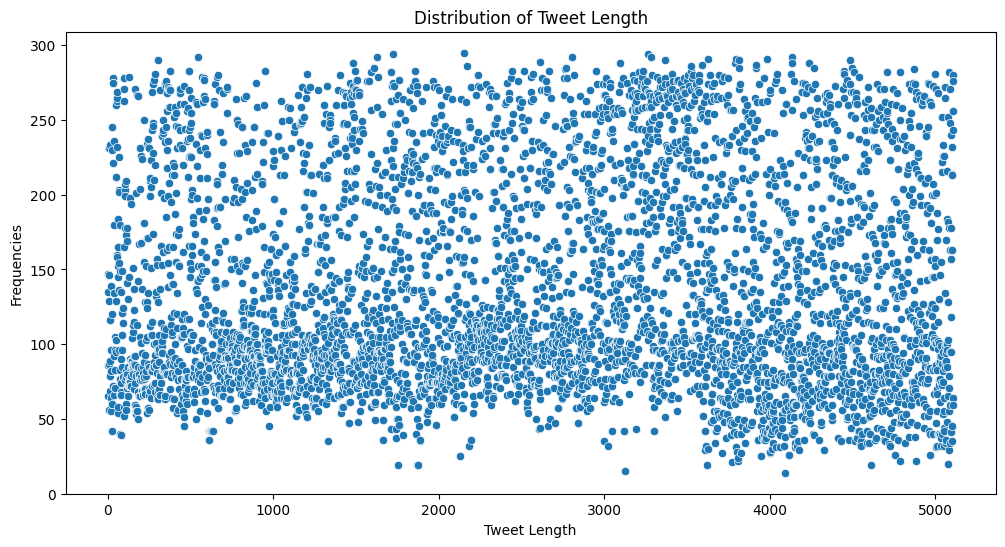

In [37]:
df['full_text_length'] = df['full_text'].apply(len)

plt.figure(figsize=(12, 6))
sns.scatterplot(df['full_text_length'])
plt.xlabel('Tweet Length')
plt.ylabel('Frequencies')
plt.title('Distribution of Tweet Length')
plt.show()

<Axes: xlabel='full_text_length', ylabel='Count'>

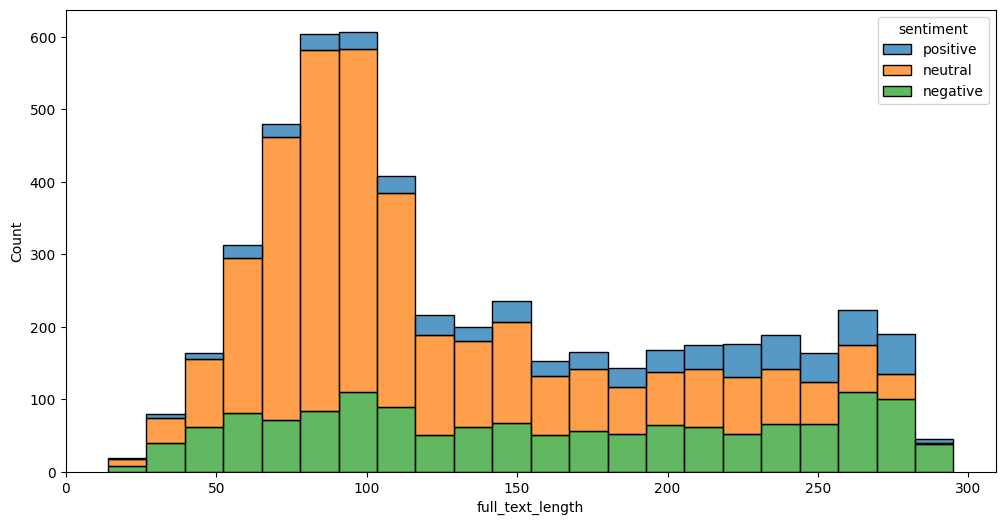

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='full_text_length', hue='sentiment', multiple='stack')

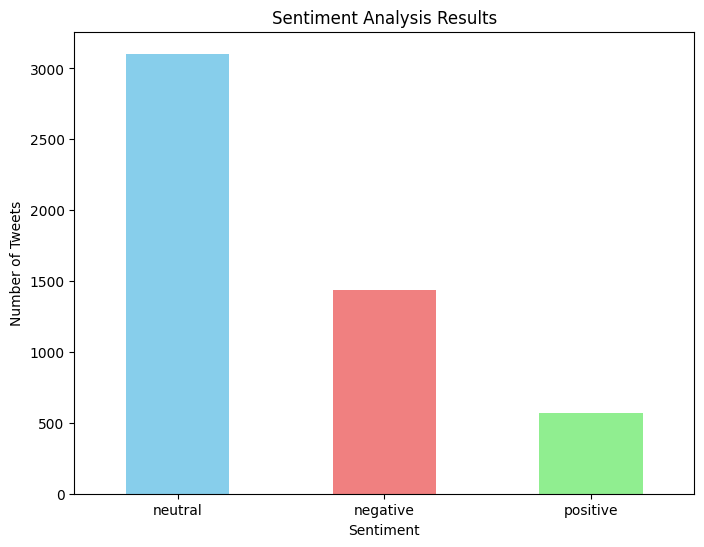

In [18]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [35]:
file_path = '/content/norm.txt'
norm = {}
with open(file_path, 'r') as f:
    for line in f:
        key, value = line.strip().split(':', 1)  # Pisahkan key dan value
        norm[key.strip().replace('"', '')] = value.strip().replace('"', '')

def remove_duplicates(df):
  df_cleaned = df.drop_duplicates(subset=['full_text'], keep='first')
  return df_cleaned

def clean_twitter_text(text):
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'pic.twitter.com\S+', '', text)
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'-', ' ', text)
  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  return text.lower()

def bersihkan_promosi(teks):
  pola = r"download.*$"
  teks_bersih = re.sub(pola, "", teks, flags=re.IGNORECASE)
  return teks_bersih.strip()


def normalize_text(text):
    words = text.split()
    normalized_words = [norm[word] if word in norm else word for word in words]
    normalized_text = ' '.join(normalized_words)
    return normalized_text.lower()

exclude_words = ["menangis","setuju", "naturalisasi", "indonesia", "mendukung", "dukung", "dukungan", "persetujuan", "WNI", "warga negara", "asing", "proses", "pemain", "timnas", "tidak", "bukan", "jangan"]
def remove_stopwords(text, exclude_words=[]):
       # Handle float values
       if isinstance(text, float):
           text = str(text)  # Convert float to string
       tokens = word_tokenize(text.lower())
       filtered_tokens = [token for token in tokens if token not in stopwords.words('indonesian') or token in exclude_words]
       processed_text = ' '.join(filtered_tokens)
       return processed_text

def stemming(text, exclude_words=[]):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  words = word_tokenize(text)
  stemmed_words = [word if word in exclude_words else stemmer.stem(word) for word in words]
  stemmed_text = " ".join(stemmed_words)
  return stemmed_text

In [38]:
## remove outlier IQR
Q1 = df['full_text_length'].quantile(0.25)
Q3 = df['full_text_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Data Sebelum Dihapus Outlier:")
print(df.shape)

df = df[(df['full_text_length'] >= lower_bound) & (df['full_text_length'] <= upper_bound)]
print("Data Setelah Dihapus Outlier:")
print(df.shape)

Data Sebelum Dihapus Outlier:
(5110, 4)
Data Setelah Dihapus Outlier:
(5110, 4)


In [39]:
df = remove_duplicates(df)
df = df.dropna(subset=['full_text'])
df['full_text'] = df['full_text'].apply(clean_twitter_text)
df['full_text'] = df['full_text'].apply(bersihkan_promosi)
df['full_text'] = df['full_text'].apply(normalize_text)
df['full_text'] = df['full_text'].apply(remove_stopwords, exclude_words=exclude_words)
df['full_text'] = df['full_text'].apply(stemming, exclude_words=exclude_words)